In [1]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

# Carregando predições

In [12]:
PRED_PATH = "/home/kenzosaki/mestrado/data/ss-pt/bertimbau_sspt_preds.csv"
TEXT_COL = "text"
LABEL_COL = "stance_winner"

In [6]:
preds_df = pd.read_csv(PRED_PATH, index_col=0)

In [7]:
preds_df.head()

,Unnamed: 0.1,index,tw_id,text,stance_winner,prediction
4684,4684,7167,1026560665388032002,Aceitam-se legendas alternativas ...,3.0,1.0
2963,2963,4598,1264916318719008769,Bruto bruto e a peugeot 308 gt line e Audi a a...,3.0,3.0
8464,8464,12279,1256277443226279936,Tenho muita curiosidade em saber de que forma ...,0.0,3.0
6891,6891,10278,1288070916631650304,Porque ninguém te curte André,1.0,1.0
5222,5222,7931,975830546692624386,MariellePresente Mais do que nunca !,0.0,0.0


In [13]:
print(classification_report(preds_df[LABEL_COL], preds_df["prediction"], digits=4))

              precision    recall  f1-score   support

         0.0     0.7505    0.8021    0.7754       480
         1.0     0.8096    0.7725    0.7906       567
         2.0     0.0000    0.0000    0.0000         4
         3.0     0.3826    0.3729    0.3777       118

    accuracy                         0.7417      1169
   macro avg     0.4857    0.4869    0.4859      1169
weighted avg     0.7395    0.7417    0.7400      1169



/home/kenzosaki/anaconda3/envs/transformers/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kenzosaki/anaconda3/envs/transformers/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kenzosaki/anaconda3/envs/transformers/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Gerando a matriz de confusão para as predições

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
%matplotlib inline

In [14]:
label_encoder = LabelEncoder()
preds_df[LABEL_COL] = label_encoder.fit_transform(preds_df[LABEL_COL])
preds_df["prediction"] = label_encoder.fit_transform(preds_df["prediction"])

In [16]:
c_matrix = confusion_matrix(preds_df[LABEL_COL], preds_df["prediction"], normalize="true")

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=label_encoder.classes_)

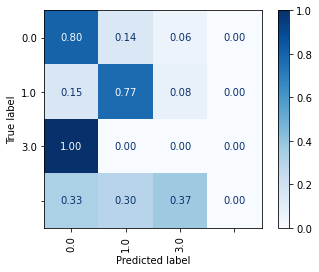

In [18]:
disp.plot(xticks_rotation="vertical", cmap="Blues", values_format=".2f")